# Random Forest Training for QSO targets selection

**Author:** Edmond Chaussidon (CEA Saclay) (contact: edmond.chaussidon@cea.fr)

This notebook explains how the random forest files (for the targets selection) are generated. To have a brief overview of the QSO targets selection and an interpretability of this selection, see `qso-dr8.ipynb` notebook written for DR8s release (however no major changes are expected with DR9 !)

All the file are written and saved in NERSC : `/global/cfs/cdirs/desi/target/analysis/RF`

**/!\** **WARNING** This notebook had generated files in NERSC !! **PLEASE** change path and savename to don't overwritte data or be sure to keep alive the current files. **/!\**

The training is divided in three parts :
    
    * 1) data_collection : collect data from dr9 (match sdss with dr9)
    * 2) data_preparation : build atributes for RF
    * 3) train_test_RF : training and some tests

**Remark:** The first part is time consumming and already saved in : `/global/cfs/cdirs/desi/target/analysis/RF/`

**UPDATE:** We add quasars from VI in the training!


In [4]:
DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

-------
## 1.1)  data_collection

**WARNING:** This part is time consuming...

**REMARK:** Not necessary to run this section for the training if the files are existing in DIR **/!\** 

In [5]:
from desitarget.train.data_collection.sweep_meta import sweep_meta

sweep_meta('dr9s', f'{DIR}dr9s_sweep_meta.fits')
sweep_meta('dr9n', f'{DIR}dr9n_sweep_meta.fits')

* Add your version of topcat in my_tractor_extract_batch.py :

    `STILTSCMD = 'java -jar -Xmx4096M /global/homes/e/edmondc/Software/topcat/topcat-full.jar -stilts'`
    
* If you want a version of topcat go [here](`http://www.star.bris.ac.uk/~mbt/topcat/`).


In [ ]:
#from desitarget.train.data_collection.my_tractor_extract_batch import my_tractor_extract_batch

#collect QSO sample
#my_tractor_extract_batch(16, f'{DIR}QSO_DR9s_sdss.fits', 'dr9s', '0,360,-10,30', 'qso', path_train, DIR)

In [ ]:
#collect stars sample
#my_tractor_extract_batch(4, f'{DIR}STARS_DR9s.fits', 'dr9s', '320,340,-1.25,1.25', 'stars', path_train, DIR)

In [ ]:
#collect test sample 
#my_tractor_extract_batch(4, f'{DIR}TEST_DR9s.fits', 'dr9s', '30,45,-5,5', 'test', path_train, DIR)

## 1.2) Add QSOs from VI

    * We match VI quasars with DR9 photometry
    * We add ALL quasars on the catalog (don't check if they are in the test zone --> they will be removed in the next step!)
    * We add VI quasars which are in the test zone into the Test file

[INFO] Read /global/u2/e/edmondc/Scratch/SHARE/qso_deep_january_stripe82.fits ...


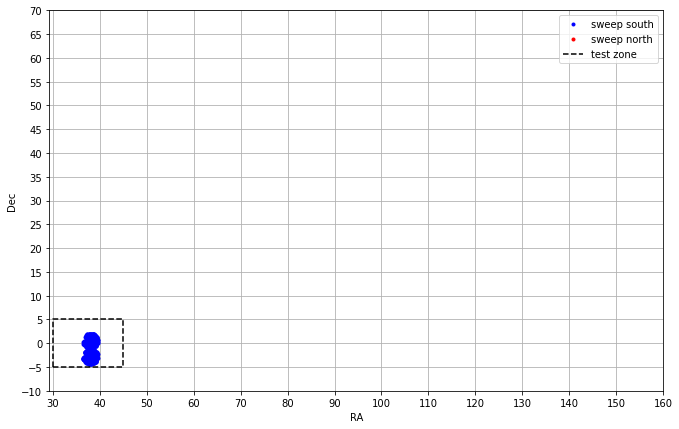

[INFO] Number of HXPIXEL in South : 6
[INFO] Number of HXPIXEL in North : 5


OSError: FITSIO status = 104: could not open the named file
failed to find or open the following file: (ffopen)
/global/homes/e/edmondc/Legacy_survey_sweep/dr9/south/sweep/9.0/sweep-100p030-11
0p035.fits


In [8]:
from desitarget.train.data_collection.QSOs_from_VI import extract_qsos_from_vi, sdss_vi_merger

DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

vi_catalog_list = ['/global/u2/e/edmondc/Scratch/SHARE/qso_deep_january_stripe82.fits'] #'/global/u2/e/edmondc/Scratch/SHARE/QSO_cascade_V0.fits'
output_path = f'{DIR}QSO_DR9s_VI.fits'

extract_qsos_from_vi(vi_catalog_list, output_path)

In [5]:
from desitarget.train.data_collection.QSOs_from_VI import sdss_vi_merger

file_sdss = f'{DIR}QSO_DR9s_SDSS.fits'
file_VI = f'{DIR}QSO_DR9s_VI.fits'

output = f'{DIR}QSO_DR9s.fits'

sdss_vi_merger(file_sdss, file_VI, output)

Nbr QSOs from SDSS : 382256
Nbr QSOs from VI : 2605
Nbr QSOs for training : 384861


In [6]:
from desitarget.train.data_collection.QSOs_from_VI import add_qso_vi_test

file_test = f'{DIR}TEST_DR9s.fits'
file_VI = f'{DIR}QSO_DR9s_VI.fits'

output = f'{DIR}TEST_DR9s_final.fits'

test_zone = [30, 45, -5, 5]

add_qso_vi_test(file_test, file_VI, output, test_zone)

Nbr new quasars in Test zone :  458


--------
## 2) data_preparation 

**Remark :** We remove test region from training data in *data_preparation/Code/make_training_samples.py* (it is **hard coding**)  for the region 30<RA<45 & -5<DEC<5. 

**/!\** **Take CARE** if you don't use this region for the test_sample **/!\**

n_STARS initial : 3153782
[INFO] shift photometry for 0 objects
[WARNING] REMOVE FROM THE STARS TRAINING maskbits 1, 5, 6, 7, 10, 12, 13 (IF YOU WANT TO ADD/REMOVE MORE MASKBITS GO HERE)
[INFO] Removing test region...
n_STARS after selection/before normalization : 465934

n_QSO initial : 384861
[INFO] shift photometry for 881 objects


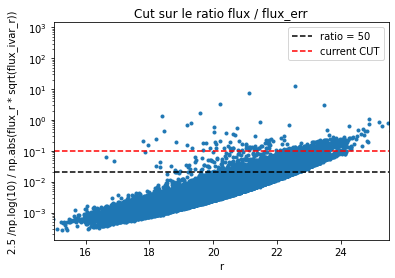

[WARNING] REMOVE FROM THE QSO TRAINING maskbits 1, 5, 6, 7, 10, 12, 13 (IF YOU WANT TO ADD/REMOVE MORE MASKBITS GO HERE)
[INFO] Removing test region...
n_QSO selected in FatStripe82 : 54004
n_QSO selected outside FatStripe82 : 276046
n_QSO after selection : 330050

╔STARS/QSO TABLE══╦═══════════════╦═══════════════════╦═════════════════════════╦═════════════╦═══════════════════╦══════════════╗
║ m_rmag ║ M_rmag ║ n_STARS_drmag ║ n_sel_STARS_drmag ║ n_sel_STARS_drmag_z>3.2 ║ n_QSO_drmag ║ n_QSO_drmag_z>3.2 ║ nw_QSO_drmag ║
╠════════╬════════╬═══════════════╬═══════════════════╬═════════════════════════╬═════════════╬═══════════════════╬══════════════╣
║  17.5  ║  17.7  ║      8122     ║        1116       ║            14           ║     1116    ║         14        ║ 310          ║
╠════════╬════════╬═══════════════╬═══════════════════╬═════════════════════════╬═════════════╬═══════════════════╬══════════════╣
║  17.7  ║  17.9  ║      8608     ║        1694       ║            23          

In [2]:
DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

from desitarget.train.data_preparation.make_training_samples import make_training_samples

#range in r mag for the training and test sample : 17.5 <--> max_rmag
max_rmag = 23.2

# Need to find a balance between acceptable errors in the measured data and good representativeness of the photometric scattering inherent to QSO.
# (cf mail exchange with Christophe and Nathalie)
# Ratio = QSO_data.FLUX_R * np.sqrt(QSO_data.FLUX_IVAR_R)
# 0.2 ==> ratio=5 | 0.1 ==> ratio=10 | 0.02 ==> ratio=50
QSO_MAX_MAG_ERR_LEVEL = 0.1

#changer nom qso sample for training
make_training_samples(f'{DIR}QSO_DR9s.fits', f'{DIR}STARS_DR9s.fits', f'{DIR}QSO_TrainingSample_DR9s.fits', f'{DIR}STARS_TrainingSample_DR9s.fits', f'{DIR}STARS_TrainingSample_Highz_DR9s.fits', max_rmag, QSO_MAX_MAG_ERR_LEVEL)

In [3]:
from desitarget.train.data_preparation.make_test_sample import make_test_sample

make_test_sample(f'{DIR}TEST_DR9s_final.fits', f'{DIR}TestSample_DR9s.fits', max_rmag=23.0)

MASKBIT USED : 1, 5, 6, 7, 10, 12, 13 
n_OBJ avant selection : 20035708
n_QSO avant selection : 18760
[INFO] shift photometry for 0 objects
Selection finie
min_ra : 30 deg, max_ra : 45 deg
min_dec : -5 deg, max_dec : 5 deg
skyArea : 150 deg2
n_OBJ : 3135690
n_QSO : 18399
[INFO] shift photometry for 0 objects
Save : /global/cfs/cdirs/desi/target/analysis/RF/TestSample_DR9s_old.fits


------
## 3) train_test_RF


In [6]:
from pathlib import Path
path_train = f'{Path().absolute()}/../../py/desitarget/train/'

DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

max_rmag = 23.2

In [7]:
#Pipeline Congifuration (to generate RF with different hyperparameters)
from desitarget.train.train_test_RF.PipelineConfigScript import PipelineConfigScript

fpn_STARS_TrainingSample = f"{DIR}STARS_TrainingSample_DR9s.fits"
fpn_STARS_TrainingSample_Highz = f"{DIR}STARS_TrainingSample_Highz_DR9s.fits"
fpn_QSO_TrainingSample = f"{DIR}QSO_TrainingSample_DR9s.fits"
fpn_TestSample = f"{DIR}TestSample_DR9s.fits"
fpn_QLF = f"{path_train}data_preparation/ROSS4_tabR"

suffixe = '_test_ratio10'
fpn_config = f"{DIR}config{suffixe}.npz"

PipelineConfigScript(fpn_QSO_TrainingSample, fpn_STARS_TrainingSample, fpn_STARS_TrainingSample_Highz, fpn_TestSample, fpn_QLF, fpn_config, max_rmag=max_rmag, suffixe=suffixe)


///**********TS CONFIG SCRIPT**********///
Save : /global/cfs/cdirs/desi/target/analysis/RF/config_test_ratio10.npz


In [8]:
#Random Forest training
from desitarget.train.train_test_RF.train_RF import train_RF

#RF all-z training
train_RF(f'{DIR}config{suffixe}.npz', 'DR9s_LOW', f'{DIR}RFmodel/DR9s_LOW')


///**********TRAIN RF**********///
INFO::TRAIN RF: RELEASE : ('DR9s')
INFO::TRAIN RF: BANDS : ('grzW')
INFO::TRAIN RF: MODEL : ('DR9s_LOW')
INFO::TRAIN RF: HYPERPARAMETERS SPACE :
OrderedDict([('RF:maxDepth',
              [25]),
             ('RF:maxLNodes',
              [850]),
             ('RF:min_zred',
              [[0.0,
                6.0]]),
             ('RF:nTrees',
              [500])])
INFO::TRAIN RF: hyParamSpaceSize : ( 1 )
INFO::TRAIN RF: hyParamSpaceShape : ( [1, 1, 1, 1] )

INFO::TRAIN RF: feature_names : (['g_r', 'r_z', 'g_z', 'g_W1', 'r_W1', 'z_W1', 'g_W2', 'r_W2', 'z_W2', 'W1_W2', 'r'])
INFO::TRAIN RF: n_features : (11)
INFO::TRAIN RF: n_jobs : (20)

INFO::TRAIN RF: STARS Training Sample : ('/global/cfs/cdirs/desi/target/analysis/RF/STARS_TrainingSample_DR9s.fits')
INFO::TRAIN RF: n_STARS : (291462)
INFO::TRAIN RF: QSO Training Sample : ('/global/cfs/cdirs/desi/target/analysis/RF/QSO_TrainingSample_DR9s.fits')
INFO::TRAIN RF: n_QSO (330050)

INFO::TRAIN RF: TR

In [9]:
#RF Highz training
train_RF(f'{DIR}config{suffixe}.npz', 'DR9s_HighZ', f'{DIR}RFmodel/DR9s_HighZ')


///**********TRAIN RF**********///
INFO::TRAIN RF: RELEASE : ('DR9s')
INFO::TRAIN RF: BANDS : ('grzWHighz')
INFO::TRAIN RF: MODEL : ('DR9s_HighZ')
INFO::TRAIN RF: HYPERPARAMETERS SPACE :
OrderedDict([('RF:maxDepth',
              [25]),
             ('RF:maxLNodes',
              [850]),
             ('RF:min_zred',
              [[3.2,
                6.0]]),
             ('RF:nTrees',
              [500])])
INFO::TRAIN RF: hyParamSpaceSize : ( 1 )
INFO::TRAIN RF: hyParamSpaceShape : ( [1, 1, 1, 1] )

INFO::TRAIN RF: feature_names : (['g_r', 'r_z', 'g_z', 'g_W1', 'r_W1', 'z_W1', 'g_W2', 'r_W2', 'z_W2', 'W1_W2', 'r'])
INFO::TRAIN RF: n_features : (11)
INFO::TRAIN RF: n_jobs : (20)

INFO::TRAIN RF: STARS Training Sample : ('/global/cfs/cdirs/desi/target/analysis/RF/STARS_TrainingSample_Highz_DR9s.fits')
INFO::TRAIN RF: n_STARS : (12592)
INFO::TRAIN RF: QSO Training Sample : ('/global/cfs/cdirs/desi/target/analysis/RF/QSO_TrainingSample_DR9s.fits')
INFO::TRAIN RF: n_QSO (330050)

INFO::

In [9]:
#Sklearn to desitarget format
from desitarget.train.train_test_RF.Convert_to_DESI_RF import convert_and_save_to_desi 

RF_filename_input = f"{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500{suffixe}.pkl.gz"
RF_filename_output = f"{DIR}RFmodel_desitarget/rf_model_dr9{suffixe}.npz"
convert_and_save_to_desi(RF_filename_input, RF_filename_output)

RF_HighZ_filename_input = f"{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500{suffixe}.pkl.gz"
RF_HighZ_filename_output = f"{DIR}RFmodel_desitarget/rf_model_dr9_HighZ{suffixe}.npz"
convert_and_save_to_desi(RF_HighZ_filename_input, RF_HighZ_filename_output)

Starting convertion...
File load :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_ratio_10_without_VI_r_23.2.pkl.gz
RandomForestClassifier(max_depth=25, max_leaf_nodes=850, n_estimators=500,
                       n_jobs=20) 

Desi format is saved at :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel_desitarget/rf_model_dr9_ratio_10_without_VI_r_23.2.npz 

Starting convertion...
File load :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_ratio_10_without_VI_r_23.2.pkl.gz
RandomForestClassifier(max_depth=25, max_leaf_nodes=850, n_estimators=500,
                       n_jobs=20) 

Desi format is saved at :  /global/cfs/cdirs/desi/target/analysis/RF/RFmodel_desitarget/rf_model_dr9_HighZ_ratio_10_without_VI_r_23.2.npz 



------------
## 4) Some tests 

    * Plot for completeness, importance feature ect ...
    * enable also to tune the threshold selection :) 


############################################
Input file =  /global/cfs/cdirs/desi/target/analysis/RF/TestSample_DR9s_old.fits
Original size:  3135690
Reduce size:  535391
############################################

Load Random Forest: 
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz
Random Forest over:  535391  objects

############################################
R magnitude Elements from Test Sample : 
R_mag max =  22.99998664855957  -- R_mag min =  17.5000057220459
R_mag max selected =  23.0  -- R_mag min selected =  17.0
############################################

############################################
Geomeric Elements from Test Sample : 
RA max =  44.9999947554622  -- RA min =  30.000014361134387
DEC max =  4.999982968350073  -- DEC 

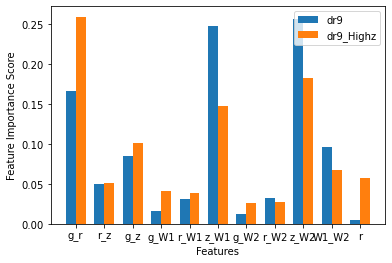

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


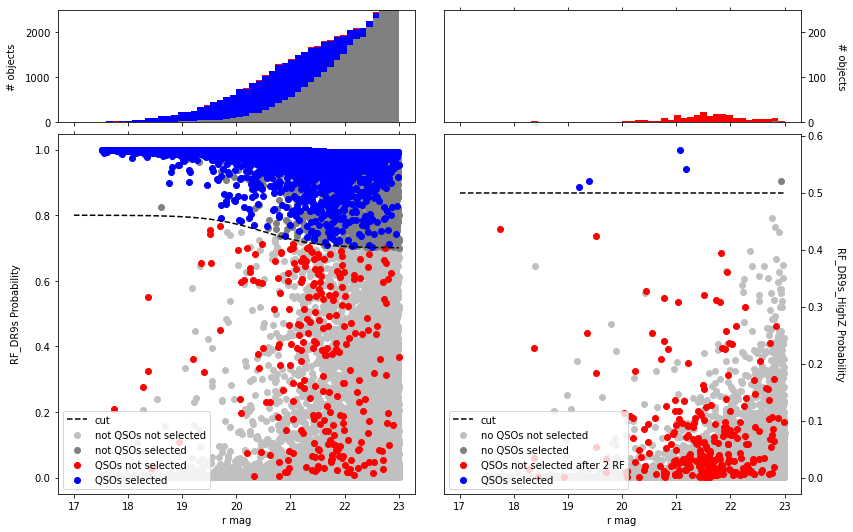

/global/homes/e/edmondc/Software/desitarget/py/desitarget/train/train_test_RF/Some_tests.py:200: RuntimeWarning: invalid value encountered in true_divide
  ratio = y/x
/global/homes/e/edmondc/Software/desitarget/py/desitarget/train/train_test_RF/Some_tests.py:203: RuntimeWarning: invalid value encountered in true_divide
  errors = np.sqrt(y*(x-y)/x**3)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


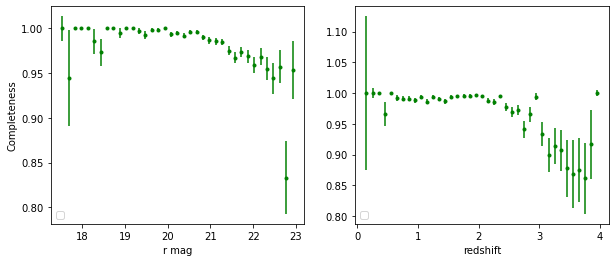

In [4]:
#plot only for one training

from desitarget.train.train_test_RF.Some_tests import make_some_tests_and_plots

suffixe = '_test_ratio10'

inputFile = f'{DIR}TestSample_DR9s_old.fits'
RF_file = f'{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500{suffixe}.pkl.gz'
RF_Highz_file = f'{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500{suffixe}.pkl.gz'

make_some_tests_and_plots(inputFile, RF_file, RF_Highz_file, rmax=23.0)


############################################
Input file =  /global/cfs/cdirs/desi/target/analysis/RF/TestSample_DR9s.fits
Original size:  3535736
Reduce size:  535736
############################################

Load Random Forest: 
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz
Random Forest over:  535736  objects

Load Random Forest: 
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio5.pkl.gz
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio5.pkl.gz
Random Forest over:  535736  objects

############################################
R magnitude Elements from Test Sample : 
R_mag ma

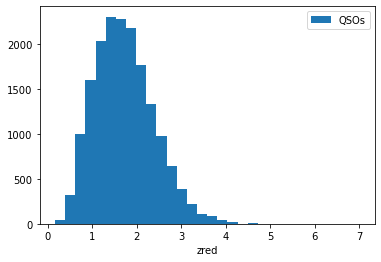


[INFO] ratio10 :  cut_1 = 0.73 - 0.05*np.tanh(r - 20.5) & cut_Highz = 0.5


############################################
density dr9 =  324.14117027306247  deg^-2 completeness dr9 0.9831102430056874
density dr9 Highz =  0.08000028883150798  deg^-2 completeness dr9 Highz 0.0002297926121675188
density dr9 Total =  324.221170561894  deg^-2 completeness dr9 Total 0.9833400356178549
############################################


[INFO] ratio5 : cut_2 = 0.74 - 0.05*np.tanh(r - 20.5) & cut_Highz = 0.5


############################################
density dr9 =  323.58783494197786  deg^-2 completeness dr9 0.9829953466996036
density dr9 Highz =  0.06666690735958998  deg^-2 completeness dr9 Highz 0.0002297926121675188
density dr9 Total =  323.65450184933746  deg^-2 completeness dr9 Total 0.9832251393117711
############################################



/global/homes/e/edmondc/Software/desitarget/py/desitarget/train/train_test_RF/Some_tests.py:173: RuntimeWarning: invalid value encountered in true_divide
  ratio = y/x
/global/homes/e/edmondc/Software/desitarget/py/desitarget/train/train_test_RF/Some_tests.py:176: RuntimeWarning: invalid value encountered in true_divide
  errors = np.sqrt(y*(x-y)/x**3)


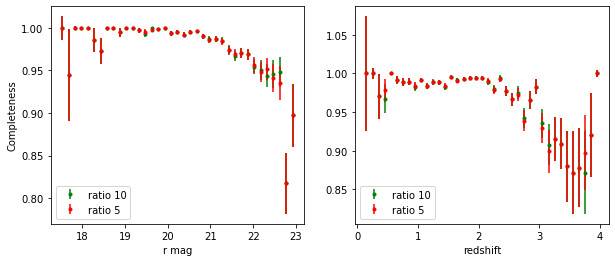

In [1]:
#plot to compare two differents training

from desitarget.train.train_test_RF.Some_tests import make_some_tests_and_plots_2_training

DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

inputFile = f'{DIR}TestSample_DR9s.fits'

RF_file = f'{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz'
RF_Highz_file = f'{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz'

cut = [0.7, 0.05, 22.5, 0.9]

RF_file_2 = f'{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio5.pkl.gz'
RF_Highz_file_2 = f'{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio5.pkl.gz'

cut2 = [0.7, 0.05, 22.5, 0.9]

make_some_tests_and_plots_2_training(inputFile, RF_file, RF_Highz_file, RF_file_2, RF_Highz_file_2, r_mag_max_sel=23.0)


############################################
Input file =  /global/cfs/cdirs/desi/target/analysis/RF/TestSample_DR9s_old.fits
Original size:  3135690
Reduce size:  535391
############################################

Load Random Forest: 
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz
    * /global/cfs/cdirs/desi/target/analysis/RF/RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz
Random Forest over:  535391  objects

Load Old Random Forest : 
    * /global/homes/e/edmondc/Software/desitarget/py/desitarget/data/rf_model_dr9.npz
    * /global/homes/e/edmondc/Software/desitarget/py/desitarget/data/rf_model_dr9_HighZ.npz
Random Forest over :  535391  objects

############################################
R magnitude Elements from Test Sample : 
R_mag max =  22.99998664855957  -- R_mag min =  17.5000057220459
R_mag max selected =  22.7  -- R_mag min 

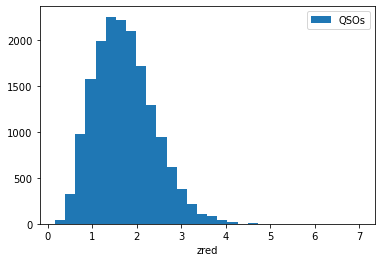


############ NEW #####################

[INFO] FOR NEW :  cut = 0.7 - 0.05*np.tanh(r - 22.5) & cut_Highz = 0.9

density dr9 =  264.74762250640373  deg^-2 completeness dr9 0.9850014762326542  density dr9 QSO>3.0 :  4.06001465819903  (ie)  88.38896952104498 % de l'echantillong de test
density dr9 Highz =  3.3133452957716223  deg^-2 completeness dr9 Highz 0.00070859167404783  densisty dr9 Highz QSO>3.0 :  0.020000072207876994  (ie)  0.01771479185119575 % de l'echantillong de test
density dr9 Total =  268.06096780217536  deg^-2 completeness dr9 Total 0.9857100679067021
############################################


########## REFERENCE ############################

[INFO] (WARNING : the test sample is in a contaminated region of DES) so the cut is harder than in des : cut = 0.8 - 0.05*np.tanh(r - 20.5) & cut_Highz = 0.55  

density dr9 =  271.28764611837954  deg^-2 completeness dr9 0.9870091526424565
density dr9 Highz =  3.026677594125385  deg^-2 completeness dr9 Highz 0.00124003542958370

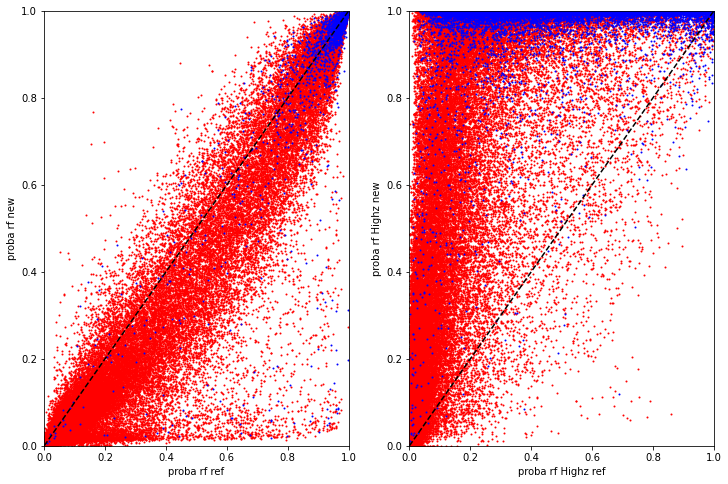

In [ ]:
#plot to compare two differents training

from desitarget.train.train_test_RF.Some_tests import new_training_versus_desitarget

DIR = '/global/cfs/cdirs/desi/target/analysis/RF/'

inputFile = f'{DIR}TestSample_DR9s_old.fits'

RF_file = f'{DIR}RFmodel/DR9s_LOW/model_DR9s_LOW_z[0.0, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz'
RF_Highz_file = f'{DIR}RFmodel/DR9s_HighZ/model_DR9s_HighZ_z[3.2, 6.0]_MDepth25_MLNodes850_nTrees500_test_ratio10.pkl.gz'

cut = [0.7, 0.05, 22.5, 0.9]

new_training_versus_desitarget(inputFile, RF_file, RF_Highz_file, cut=cut, r_mag_max_sel=22.7)

il y a 410 high z entre 30 45 -5 5 -> 150 deg2 ==> 410/150 = 2.73 par deg2